In [6]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from utils import mnist_reader
from sklearn.model_selection import train_test_split

class Dataset:
  def __init__(self, x, y, batch_size = 32):
    self.x = x
    self.y = y
    self.batch_size = batch_size
    self.length = int(np.ceil(x.shape[0]/batch_size))
    self.indices = np.arange(x.shape[0]) # 0, 1, 2, 3, 4, ..., n - 1

  def __getitem__(self, i): # i: 0, 1, 2, 3 ..., __len__
    i0 = i*self.batch_size
    i1 = min((i + 1)*self.batch_size, self.x.shape[0])
    index = self.indices[i0:i1]
    return self.x[index], self.y[index]

  def __len__(self):
    return self.length

  def shuffle(self):
    self.indices = np.random.permutation(self.indices)

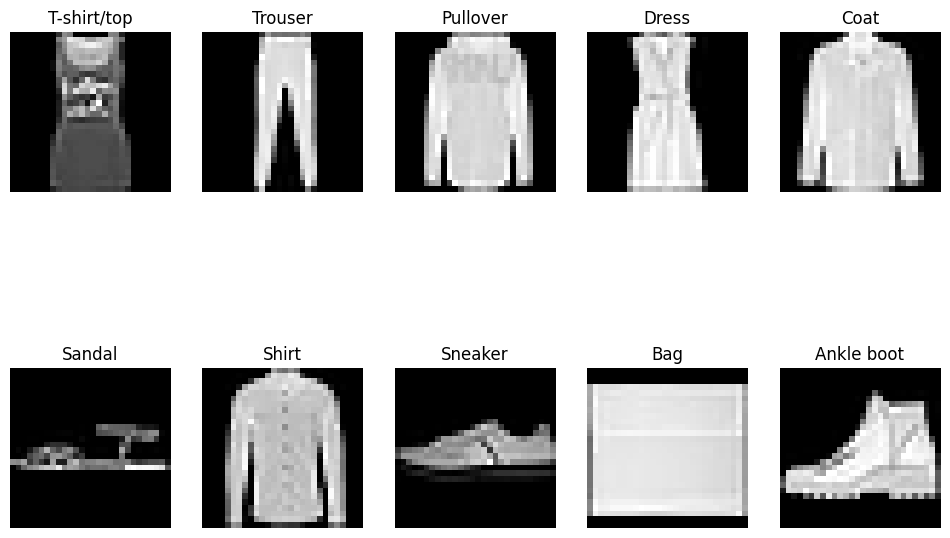

In [5]:
# Load Fashion-MNIST training data using utils.mnist_reader
train_images, train_labels = mnist_reader.load_mnist('data/fashion', kind='train')

# Normalize the training data to the range [0, 1]
train_images = train_images / 255.0

# Define the class labels for Fashion-MNIST
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize one random sample from each class
plt.figure(figsize=(12, 8))
for i in range(10):
    # Filter samples for the current class
    class_samples = train_images[train_labels == i]

    # Randomly choose one sample from the current class
    random_index = np.random.randint(0, len(class_samples))
    random_sample = class_samples[random_index]

    # Reshape the sample to (28, 28) for plotting
    random_sample = np.reshape(random_sample, (28, 28))

    # Plot the sample
    plt.subplot(2, 5, i + 1)
    plt.imshow(random_sample, cmap='gray')
    plt.title(class_labels[i])
    plt.axis('off')

plt.show()

Training set shape: torch.Size([19660, 1, 28, 28])
Training labels shape: torch.Size([19660])
Validation set shape: torch.Size([4916, 1, 28, 28])
Validation labels shape: torch.Size([4916])


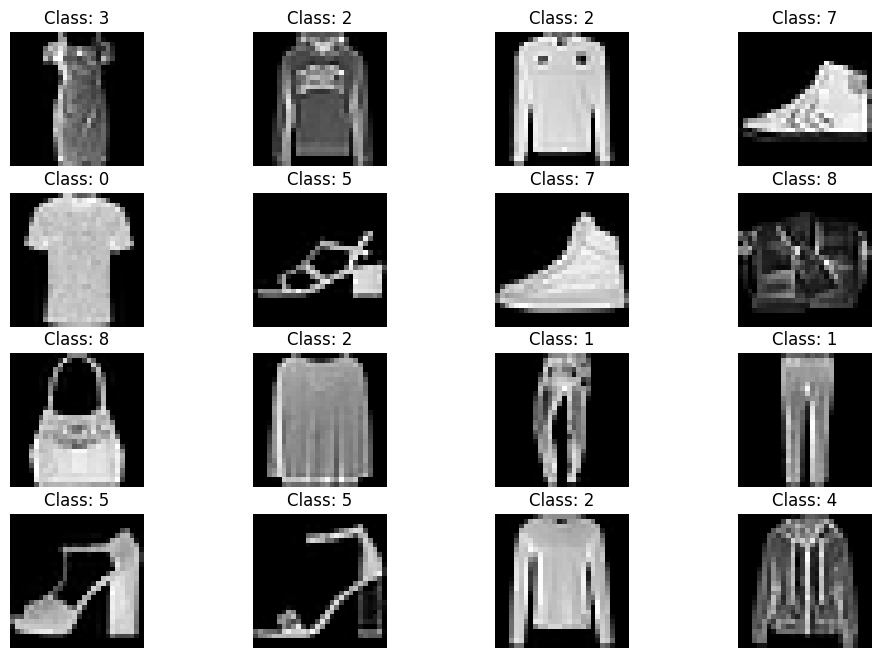

In [11]:
# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

# Reshape the samples for both training and validation sets
train_images = train_images.reshape(-1, 1, 28, 28)
val_images = val_images.reshape(-1, 1, 28, 28)

# Convert NumPy arrays to PyTorch tensors
train_images = torch.Tensor(train_images)
train_labels = torch.LongTensor(train_labels)
val_images = torch.Tensor(val_images)
val_labels = torch.LongTensor(val_labels)

# Convert class labels to one-hot encodings
train_labels_onehot = torch.zeros(train_labels.size(0), 10)
train_labels_onehot.scatter_(1, train_labels.view(-1, 1), 1)
val_labels_onehot = torch.zeros(val_labels.size(0), 10)
val_labels_onehot.scatter_(1, val_labels.view(-1, 1), 1)

# Print the shapes of the subsets
print("Training set shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation set shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)

# Create custom datasets using the provided Dataset class
train_dataset = Dataset(train_images, train_labels_onehot)
val_dataset = Dataset(val_images, val_labels_onehot)

batch_samples, batch_labels = train_dataset[0]

num_figures = 16
# Visualize the samples and corresponding class labels
plt.figure(figsize=(12, 8))
for i in range(num_figures):
    plt.subplot(4, 4, i + 1)
    sample_image = batch_samples[i][0].numpy()  # Access the first channel (single channel image)
    plt.imshow(sample_image, cmap='gray')
    #plt.title(f"Class: {torch.argmax(batch_labels[i]).item()}")
    plt.title(f"Class: {torch.argmax(batch_labels[i])}")
    plt.axis('off')
plt.show()